In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Performing EDA

In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df = df.copy() #Removing the dummies at this time
df.drop(df.columns[11:30],axis=1,inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [7]:
df.shape

(517, 12)

In [8]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [9]:
df.isnull().sum()  #No null values found

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [10]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [11]:
df.size_category.value_counts() 

small    378
large    139
Name: size_category, dtype: int64

# Outlier Detection and Cleaning

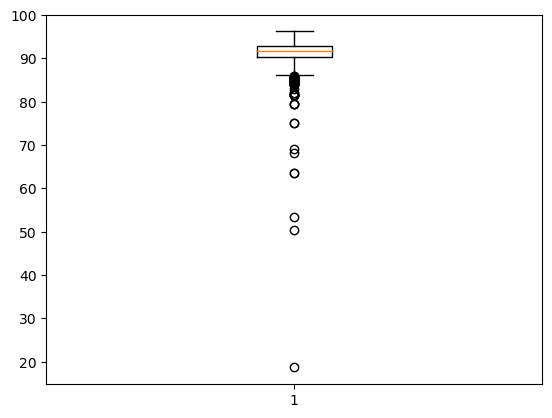

In [12]:
data_box=df.dropna()
data_box1=data_box.FFMC
plt.boxplot(data_box1)
plt.show()

In [13]:
# Calculate IQR
Q1 = df['FFMC'].quantile(0.25)
Q3 = df['FFMC'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Remove data points outside IQR range
df = df[~((df['FFMC'] < (Q1 - 1.5 * IQR)) |(df['FFMC'] > (Q3 + 1.5 * IQR)))]

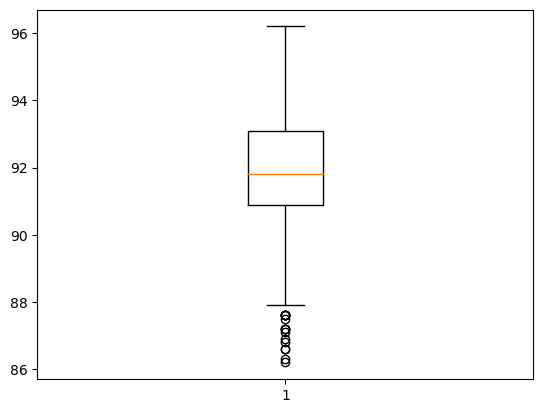

In [15]:
data_box=df.dropna()
data_box1=data_box.FFMC
plt.boxplot(data_box1)
plt.show()

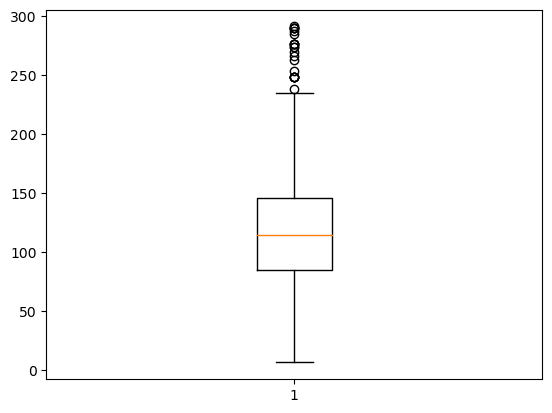

In [16]:
data_box=df.dropna()
data_box1=data_box.DMC
plt.boxplot(data_box1)
plt.show()

In [17]:
# Calculate IQR
Q1 = df['DMC'].quantile(0.25)
Q3 = df['DMC'].quantile(0.75)
IQR = Q3 - Q1

In [18]:
# Remove data points outside IQR range
df = df[~((df['DMC'] < (Q1 - 1.5 * IQR)) |(df['DMC'] > (Q3 + 1.5 * IQR)))]

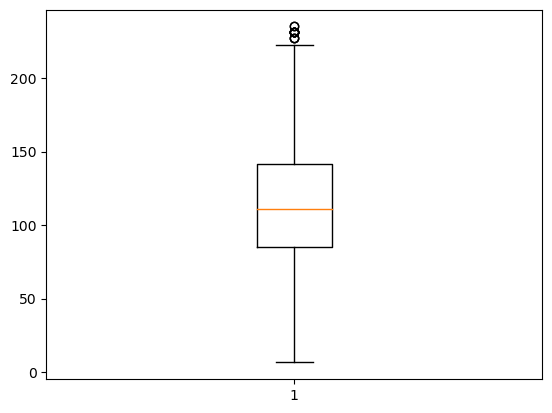

In [19]:
data_box=df.dropna()
data_box1=data_box.DMC
plt.boxplot(data_box1)
plt.show()

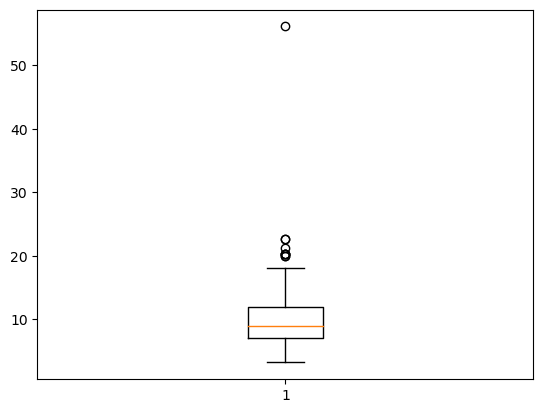

In [20]:
data_box=df.dropna()
data_box1=data_box.ISI
plt.boxplot(data_box1)
plt.show()

In [21]:
# Calculate IQR
Q1 = df['ISI'].quantile(0.25)
Q3 = df['ISI'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
# Remove data points outside IQR range
df = df[~((df['ISI'] < (Q1 - 1.5 * IQR)) |(df['ISI'] > (Q3 + 1.5 * IQR)))]

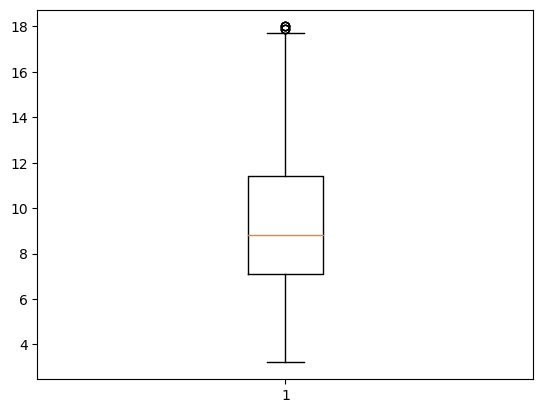

In [23]:
data_box=df.dropna()
data_box1=data_box.ISI
plt.boxplot(data_box1)
plt.show()

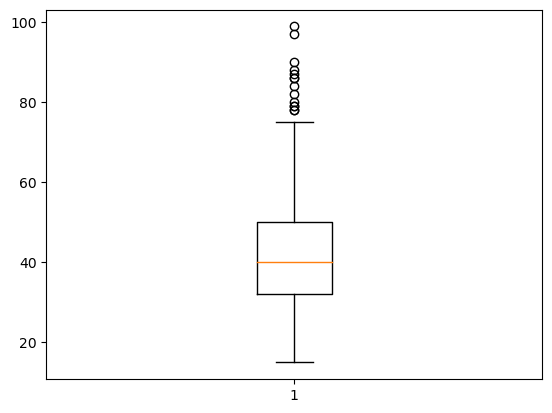

In [24]:
data_box=df.dropna()
data_box1=data_box.RH
plt.boxplot(data_box1)
plt.show()

In [25]:
# Calculate IQR
Q1 = df['RH'].quantile(0.25)
Q3 = df['RH'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
# Remove data points outside IQR range
df = df[~((df['RH'] < (Q1 - 1.5 * IQR)) |(df['RH'] > (Q3 + 1.5 * IQR)))]

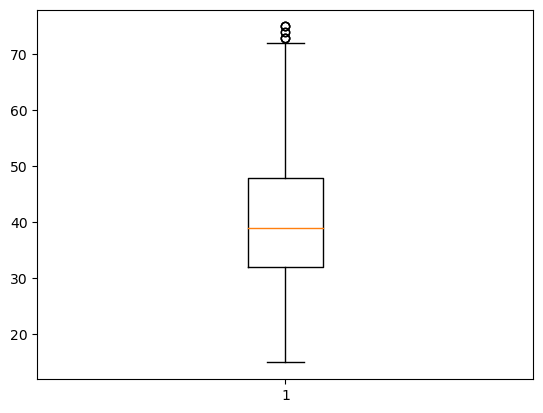

In [27]:
data_box=df.dropna()
data_box1=data_box.RH
plt.boxplot(data_box1)
plt.show()

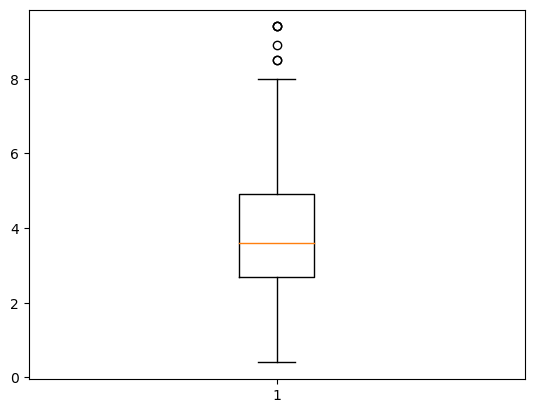

In [28]:
data_box=df.dropna()
data_box1=data_box.wind
plt.boxplot(data_box1)
plt.show()

In [29]:
# Calculate IQR
Q1 = df['wind'].quantile(0.25)
Q3 = df['wind'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
# Remove data points outside IQR range
df = df[~((df['wind'] < (Q1 - 1.5 * IQR)) |(df['wind'] > (Q3 + 1.5 * IQR)))]

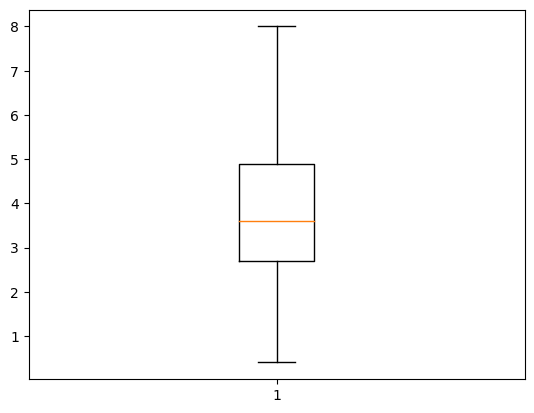

In [31]:
data_box=df.dropna()
data_box1=data_box.wind
plt.boxplot(data_box1)
plt.show()

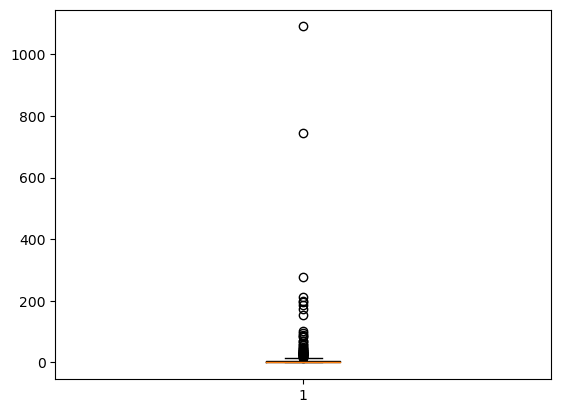

In [32]:
data_box=df.dropna()
data_box1=data_box.area
plt.boxplot(data_box1)
plt.show()

In [33]:
# Calculate IQR
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

In [34]:
# Remove data points outside IQR range
df = df[~((df['area'] < (Q1 - 1.5 * IQR)) |(df['area'] > (Q3 + 1.5 * IQR)))]

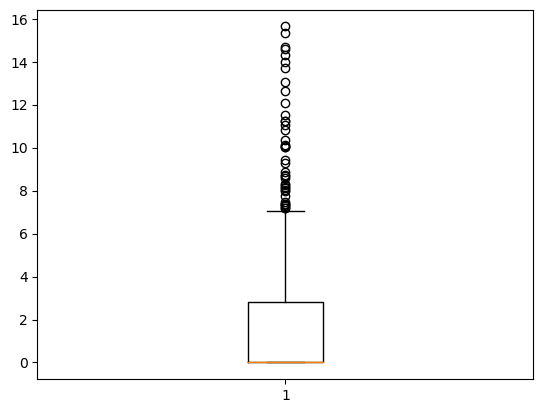

In [35]:
data_box=df.dropna()
data_box1=data_box.area
plt.boxplot(data_box1)
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 515
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          359 non-null    object 
 1   day            359 non-null    object 
 2   FFMC           359 non-null    float64
 3   DMC            359 non-null    float64
 4   DC             359 non-null    float64
 5   ISI            359 non-null    float64
 6   temp           359 non-null    float64
 7   RH             359 non-null    int64  
 8   wind           359 non-null    float64
 9   rain           359 non-null    float64
 10  area           359 non-null    float64
 11  size_category  359 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 36.5+ KB


In [37]:
#Datatype conversions
label_encoder = preprocessing.LabelEncoder()
df.month= label_encoder.fit_transform(df.month) 
df.day= label_encoder.fit_transform(df.day) 
df.size_category= label_encoder.fit_transform(df.size_category) 
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,6,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,6,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,1
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,1


In [38]:
#conda install -c conda-forge imbalanced-learn

In [39]:
#conda update -n base -c defaults conda

In [40]:
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df.copy()
#SMOTEK TECHNIQUE

#Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

#Count before
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)

#Count after
print(Counter(b)) #removed bias in dataset

Counter({1: 305, 0: 54})
Counter({1: 300, 0: 300})


In [41]:
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [42]:
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)


Epoch 1/50
29/29 [==============================] - 1s 12ms/step - loss: 0.6865 - accuracy: 0.5516 - val_loss: 0.7000 - val_accuracy: 0.4892
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5516 - val_loss: 0.7056 - val_accuracy: 0.4892
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5516 - val_loss: 0.6998 - val_accuracy: 0.4892
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5516 - val_loss: 0.6952 - val_accuracy: 0.4892
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5516 - val_loss: 0.6955 - val_accuracy: 0.4892
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5623 - val_loss: 0.6846 - val_accuracy: 0.5755
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6228 - val_loss: 0.6775 - val_accuracy: 0.5612
Epoch 8/50
29/29 [=

# Model Evaluation

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9667


In [44]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [45]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.091478,0.953737,0.049558,0.978417,45
46,0.117978,0.946619,0.067464,0.964029,46
47,0.041669,0.978648,0.026410,0.992806,47
48,0.024957,0.996441,0.036973,0.978417,48
49,0.022864,0.996441,0.055939,0.978417,49


# Visualize Training History

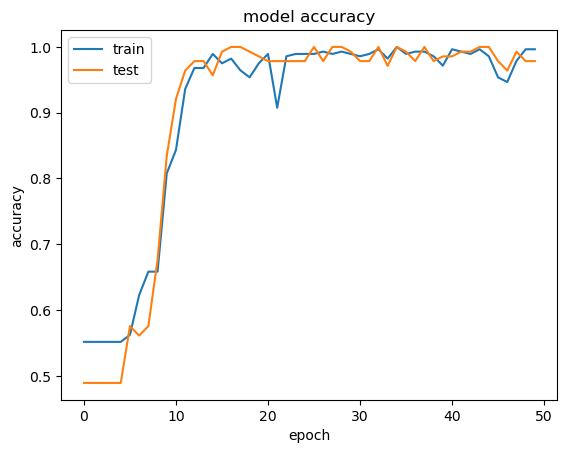

In [46]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

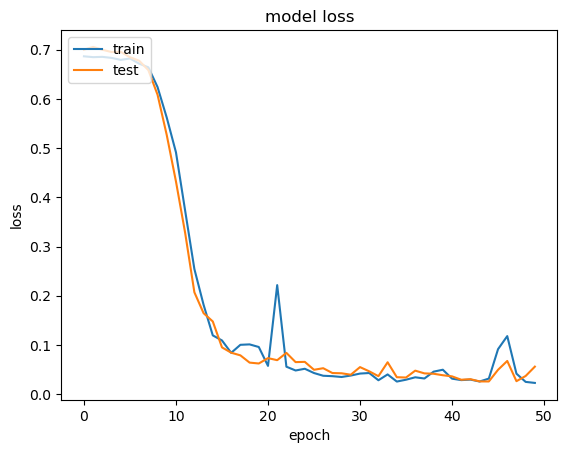

In [47]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Tuning of Hyperparameters :- Batch Size and Epochs

In [48]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [49]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [50]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [51]:
from keras.layers import Dropout

# Defining the model

def create_model2(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 14,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model2 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids2 = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid2 = GridSearchCV(estimator = model2,param_grid = param_grids2,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(X_standardized,Y)

C:\Users\thila\AppData\Local\Temp\ipykernel_15272\189809.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs = 50)
C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   2.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.992 total time=   2.0s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.950 total time=   2.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   2.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   2.1s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   2.1s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.992 total time=   1.9s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.942 total time=   2.1s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   3.1s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   1.9s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   2.0s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.992 total time=   2.0s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.958 total time=   2.2s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   1.9s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   1.9s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   2.1s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.992 total time=   2.2s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.950 total time=   2.2s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   2.0s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   2.0s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   2.1s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.992 total time=   2.2s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.958 total time=   2.2s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   2.1s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   2.0s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   2.0s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.992 total time=   3.1s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.958 total time=   2.2s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   2.0s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   2.1s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   2.4s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.992 total time=   2.5s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.950 total time=   2.3s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   2.1s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   3.1s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   2.1s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   2.4s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.950 total time=   2.3s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   2.3s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   2.3s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   2.3s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.958 total time=   2.1s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.933 total time=   2.3s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   2.1s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   2.1s


In [52]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean, stdev, param))
#Best score for Dropout rate = 0.2 and learning rate is 0.001

Best : 0.9899999976158143, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9883333325386048,0.019436511290912697 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9866666674613953,0.022730304751296837 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9899999976158143,0.01615894080914474 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9883333325386048,0.019436511290912697 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9899999976158143,0.01615894080914474 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9899999976158143,0.01615894080914474 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9883333325386048,0.019436511290912697 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9899999976158143,0.02000000476837158 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9783333301544189,0.027688747788350492 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [53]:
# Defining the model

def create_model3(activation_function,init):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 14,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model3 = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids3 = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid3 = GridSearchCV(estimator = model3,param_grid = param_grids3,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\thila\AppData\Local\Temp\ipykernel_15272\2068110780.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3 = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 20,epochs = 50)
C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.992 total time=   2.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.917 total time=   2.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.4s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   2.3s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.992 total time=   2.4s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.917 total time=   2.4s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   2.1s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   2.0s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.3s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.992 total time=   2.4s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.917 total time=   2.3s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.4s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.4s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   3.2s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.992 total time=   3.1s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.950 total time=   2.1s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   2.1s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   2.1s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   2.2s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.992 total time=   2.2s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.950 total time=   2.0s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   2.0s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   2.2s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   1.9s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.250 total time=   2.4s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.250 total time=   2.1s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   2.3s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   2.0s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.2s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.992 total time=   2.0s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.950 total time=   2.2s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.3s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.1s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.2s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.992 total time=   2.1s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.958 total time=   2.2s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.3s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.0s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   2.0s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.250 total time=   2.1s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.250 total time=   2.2s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   2.2s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   3.3s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.2s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.992 total time=   2.3s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.950 total time=   2.1s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.2s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.2s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.983 total time=   2.3s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.950 total time=   2.3s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.2s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.1s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   2.1s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.250 total time=   2.0s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.250 total time=   2.1s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   2.0s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   2.0s


In [54]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print('{},{} with: {}'.format(mean, stdev, param))
#best activation function in our case would be Relu and Kernel Initializer is Uniform

Best : 0.9899999976158143, using {'activation_function': 'tanh', 'init': 'normal'}
0.9816666722297669,0.03265985581539335 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9816666722297669,0.03265985581539335 with: {'activation_function': 'softmax', 'init': 'normal'}
0.9816666722297669,0.03265985581539335 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9883333325386048,0.019436511290912697 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9883333325386048,0.019436511290912697 with: {'activation_function': 'relu', 'init': 'normal'}
0.1,0.12247448713915891 with: {'activation_function': 'relu', 'init': 'zero'}
0.9883333325386048,0.019436511290912697 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9899999976158143,0.01615894080914474 with: {'activation_function': 'tanh', 'init': 'normal'}
0.1,0.12247448713915891 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9883333325386048,0.019436511290912697 with: {'activation_function': 'linear', 'in

# Tuning of Hyperparameter :-Number of Neurons in activation layer

In [55]:
# Defining the model

def create_model4(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model4 = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters

neuron1 = [4,8,14]
neuron2 = [4,8,12]

# Make a dictionary of the grid search parameters

param_grids4 = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid4 = GridSearchCV(estimator = model4,param_grid = param_grids4,cv = KFold(),verbose = 10)
grid_result4 = grid4.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=4........................................


C:\Users\thila\AppData\Local\Temp\ipykernel_15272\2402708710.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model4 = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 20,epochs = 50)
C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   2.1s
[CV 2/5; 1/9] START neuron1=4, neuron2=4........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.992 total time=   1.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=4........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.942 total time=   1.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=4........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   1.8s
[CV 5/5; 1/9] START neuron1=4, neuron2=4........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   2.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   2.1s
[CV 2/5; 2/9] START neuron1=4, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END .........neuron1=4, neuron2=8;, score=0.992 total time=   1.9s
[CV 3/5; 2/9] START neuron1=4, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END .........neuron1=4, neuron2=8;, score=0.950 total time=   2.0s
[CV 4/5; 2/9] START neuron1=4, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   1.9s
[CV 5/5; 2/9] START neuron1=4, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   1.8s
[CV 1/5; 3/9] START neuron1=4, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END ........neuron1=4, neuron2=12;, score=1.000 total time=   1.7s
[CV 2/5; 3/9] START neuron1=4, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END ........neuron1=4, neuron2=12;, score=0.992 total time=   1.9s
[CV 3/5; 3/9] START neuron1=4, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END ........neuron1=4, neuron2=12;, score=0.950 total time=   1.7s
[CV 4/5; 3/9] START neuron1=4, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END ........neuron1=4, neuron2=12;, score=1.000 total time=   2.0s
[CV 5/5; 3/9] START neuron1=4, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END ........neuron1=4, neuron2=12;, score=1.000 total time=   1.8s
[CV 1/5; 4/9] START neuron1=8, neuron2=4........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   1.9s
[CV 2/5; 4/9] START neuron1=8, neuron2=4........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END .........neuron1=8, neuron2=4;, score=0.992 total time=   2.2s
[CV 3/5; 4/9] START neuron1=8, neuron2=4........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END .........neuron1=8, neuron2=4;, score=0.950 total time=   1.8s
[CV 4/5; 4/9] START neuron1=8, neuron2=4........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   1.8s
[CV 5/5; 4/9] START neuron1=8, neuron2=4........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   1.9s
[CV 1/5; 5/9] START neuron1=8, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   2.0s
[CV 2/5; 5/9] START neuron1=8, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END .........neuron1=8, neuron2=8;, score=0.992 total time=   2.0s
[CV 3/5; 5/9] START neuron1=8, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END .........neuron1=8, neuron2=8;, score=0.967 total time=   1.9s
[CV 4/5; 5/9] START neuron1=8, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   2.0s
[CV 5/5; 5/9] START neuron1=8, neuron2=8........................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   2.4s
[CV 1/5; 6/9] START neuron1=8, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END ........neuron1=8, neuron2=12;, score=1.000 total time=   2.5s
[CV 2/5; 6/9] START neuron1=8, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END ........neuron1=8, neuron2=12;, score=0.992 total time=   2.4s
[CV 3/5; 6/9] START neuron1=8, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END ........neuron1=8, neuron2=12;, score=0.958 total time=   2.5s
[CV 4/5; 6/9] START neuron1=8, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END ........neuron1=8, neuron2=12;, score=1.000 total time=   2.5s
[CV 5/5; 6/9] START neuron1=8, neuron2=12.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END ........neuron1=8, neuron2=12;, score=1.000 total time=   2.5s
[CV 1/5; 7/9] START neuron1=14, neuron2=4.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END ........neuron1=14, neuron2=4;, score=1.000 total time=   2.8s
[CV 2/5; 7/9] START neuron1=14, neuron2=4.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END ........neuron1=14, neuron2=4;, score=0.992 total time=   2.9s
[CV 3/5; 7/9] START neuron1=14, neuron2=4.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END ........neuron1=14, neuron2=4;, score=0.950 total time=   2.9s
[CV 4/5; 7/9] START neuron1=14, neuron2=4.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END ........neuron1=14, neuron2=4;, score=1.000 total time=   2.0s
[CV 5/5; 7/9] START neuron1=14, neuron2=4.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END ........neuron1=14, neuron2=4;, score=1.000 total time=   2.2s
[CV 1/5; 8/9] START neuron1=14, neuron2=8.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END ........neuron1=14, neuron2=8;, score=1.000 total time=   2.2s
[CV 2/5; 8/9] START neuron1=14, neuron2=8.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END ........neuron1=14, neuron2=8;, score=0.992 total time=   2.0s
[CV 3/5; 8/9] START neuron1=14, neuron2=8.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END ........neuron1=14, neuron2=8;, score=0.950 total time=   2.1s
[CV 4/5; 8/9] START neuron1=14, neuron2=8.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END ........neuron1=14, neuron2=8;, score=1.000 total time=   2.1s
[CV 5/5; 8/9] START neuron1=14, neuron2=8.......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END ........neuron1=14, neuron2=8;, score=1.000 total time=   2.3s
[CV 1/5; 9/9] START neuron1=14, neuron2=12......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END .......neuron1=14, neuron2=12;, score=1.000 total time=   2.4s
[CV 2/5; 9/9] START neuron1=14, neuron2=12......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END .......neuron1=14, neuron2=12;, score=0.992 total time=   2.2s
[CV 3/5; 9/9] START neuron1=14, neuron2=12......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END .......neuron1=14, neuron2=12;, score=0.950 total time=   2.4s
[CV 4/5; 9/9] START neuron1=14, neuron2=12......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END .......neuron1=14, neuron2=12;, score=1.000 total time=   2.1s
[CV 5/5; 9/9] START neuron1=14, neuron2=12......................................


C:\Users\thila\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END .......neuron1=14, neuron2=12;, score=1.000 total time=   3.2s


In [56]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means4 = grid_result4.cv_results_['mean_test_score']
stds4 = grid_result4.cv_results_['std_test_score']
params4 = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means4, stds4, params4):
  print('{},{} with: {}'.format(mean, stdev, param))

#Best results are Neuron 1 = 4 and Neuron 2 = 4

Best : 0.9916666626930237, using {'neuron1': 8, 'neuron2': 8}
0.9866666674613953,0.022730304751296837 with: {'neuron1': 4, 'neuron2': 4}
0.9883333325386048,0.019436511290912697 with: {'neuron1': 4, 'neuron2': 8}
0.9883333325386048,0.019436511290912697 with: {'neuron1': 4, 'neuron2': 12}
0.9883333325386048,0.019436511290912697 with: {'neuron1': 8, 'neuron2': 4}
0.9916666626930237,0.012909955260256607 with: {'neuron1': 8, 'neuron2': 8}
0.9899999976158143,0.01615894080914474 with: {'neuron1': 8, 'neuron2': 12}
0.9883333325386048,0.019436511290912697 with: {'neuron1': 14, 'neuron2': 4}
0.9883333325386048,0.019436511290912697 with: {'neuron1': 14, 'neuron2': 8}
0.9883333325386048,0.019436511290912697 with: {'neuron1': 14, 'neuron2': 12}


In [57]:
# Defining the model

def create_model_fnl():
    model = Sequential()
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model
model_fnl = KerasClassifier(build_fn = create_model_fnl,verbose = 0,batch_size = 20,epochs = 50)
#Making training and Testing Data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_standardized,Y, test_size = 0.3)
# Fitting the model
hist2 = model_fnl.fit(X_train_1,y_train_1)


from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
def report_model(model):
    model_preds = model.predict(X_test_1)
    print(confusion_matrix(y_test_1,model_preds))
    print(classification_report(y_test_1,model_preds))
report_model(model_fnl)

C:\Users\thila\AppData\Local\Temp\ipykernel_15272\812501942.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_fnl = KerasClassifier(build_fn = create_model_fnl,verbose = 0,batch_size = 20,epochs = 50)


6/6 [==============================] - 0s 1ms/step
[[87  0]
 [ 1 92]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       1.00      0.99      0.99        93

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180

